In [60]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [31]:
def delta(idx) -> tuple[int, int]:
    return [(0, 1), (1, 0), (0, -1), (-1, 0)][idx]

def c_to_i(x, y, size) -> int:
    return x * size + y

def i_to_c(i, size) -> tuple[int, int]:
    return i // size, i % size

def _gen_maze(x: int, y: int, size: int, ad: np.array) -> np.array:
    for i in np.random.permutation(4):
        dx, dy = delta(i)
        x_, y_ = x + dx, y + dy

        if not (0 <= x_ < size) or not (0 <= y_ < size):
            continue

        idx = c_to_i(x, y, size)
        idx_ = c_to_i(x_, y_, size)
        
        if ad[idx, i] == 1:
            continue

        if ad[idx_, 4] == 1:
            continue

        ad[idx, i] = 1
        ad[idx_, 4] = 1
        ad[idx_, (i + 2) % 4] = 1
        ad = _gen_maze(x_, y_, size, ad)
    return ad

def generate_maze(size: int) -> np.array:
    ad = np.zeros([size * size, 5])

    x, y = size // 2, 0
    ad[c_to_i(x, y, size), 4] = 1
    ad = _gen_maze(x, y, size, ad)
    
    return ad

In [45]:
def make_diagram(ad):
    maze_diagram = np.zeros([size * 2 + 1, size * 2 + 1])
    for i in range(maze_ad.shape[0]):
        x, y = i_to_c(i, size)
        x_, y_ = 2 * x + 1, 2 * y + 1
        maze_diagram[x_, y_] = 1
        for j in range(4):
            if maze_ad[i, j] == 1:
                dx, dy = delta(j)
                maze_diagram[x_ + dx, y_ + dy] = 1

    in_x, in_y = size // 2, 0
    out_x, out_y = size // 2, size - 1
    maze_diagram[in_x * 2 + 1, in_y * 2] = 1
    maze_diagram[out_x * 2 + 1, out_y * 2 + 2] = 1
    plt.matshow(maze_diagram)

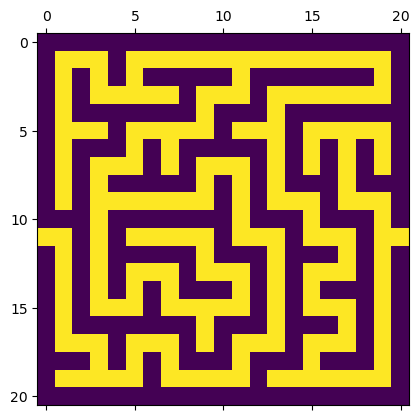

In [71]:
size = 10
maze_ad = generate_maze(size)
make_diagram(maze_ad)
with open('maze.txt', 'w+') as f: 
    f.write(str(maze_ad[:,:4].tolist()))